In [20]:
import csv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score

from pathlib import Path

In [21]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [22]:
# Display from a cell outputs of multiple commands:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [23]:
# data location:

pathToFolder = "/gdrive/MyDrive/bdda1"

In [24]:
path = Path(pathToFolder) / "product_train.csv"

In [25]:
#  Load data:

df = pd.read_csv(path)

In [26]:
# first 5 entries
df.head(5)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3921548,8,12,0,0,0,0,1,1,2,...,0,0.63,0.75,0,No,No,No,Yes,No,No
1,3191009,83,2,33,157,377,603,44,98,148,...,0,0.68,0.66,0,No,No,No,Yes,No,No
2,2935810,8,4,0,0,0,0,0,0,1,...,0,0.73,0.78,0,No,No,No,Yes,No,No
3,2205847,31,4,63,70,160,223,27,90,164,...,0,0.73,0.78,0,No,No,Yes,Yes,No,No
4,4953497,3,12,0,0,0,0,0,0,0,...,0,0.81,0.74,0,No,No,No,Yes,No,No


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250078 entries, 0 to 250077
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                250078 non-null  int64  
 1   national_inv       250078 non-null  int64  
 2   lead_time          250078 non-null  int64  
 3   in_transit_qty     250078 non-null  int64  
 4   forecast_3_month   250078 non-null  int64  
 5   forecast_6_month   250078 non-null  int64  
 6   forecast_9_month   250078 non-null  int64  
 7   sales_1_month      250078 non-null  int64  
 8   sales_3_month      250078 non-null  int64  
 9   sales_6_month      250078 non-null  int64  
 10  sales_9_month      250078 non-null  int64  
 11  min_bank           250078 non-null  int64  
 12  potential_issue    250078 non-null  object 
 13  pieces_past_due    250078 non-null  int64  
 14  perf_6_month_avg   250078 non-null  float64
 15  perf_12_month_avg  250078 non-null  float64
 16  lo

In [32]:
df.shape

(250078, 23)

In [33]:
df.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,2.500780e+05,2.500780e+05,250078.000000,250078.000000,2.500780e+05,2.500780e+05,2.500780e+05,250078.000000,2.500780e+05,2.500780e+05,...,250078.000000,250078.000000,250078.000000,250078.000000,250078.000000,250078.000000,250078.000000,250078.000000,250078.000000,250078.000000
mean,3.445092e+06,3.530814e+02,7.831764,43.495673,1.928422e+02,3.618791e+02,5.306028e+02,54.319968,1.785464e+02,3.532202e+02,...,1.746255,0.772383,0.776106,0.682995,0.175077,0.000168,0.114668,0.025960,0.000240,0.006458
std,7.774587e+05,5.734557e+03,6.760722,1076.528522,5.728252e+03,1.012271e+04,1.468183e+04,1562.466565,5.188470e+03,1.016469e+04,...,180.670668,0.241953,0.230465,42.306053,0.380034,0.012958,0.318622,0.159016,0.015488,0.080102
min,2.065611e+06,-3.034000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.984056e+06,4.000000e+00,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.700000,0.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.409472e+06,1.400000e+01,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,3.000000e+00,...,0.000000,0.830000,0.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.832655e+06,7.600000e+01,9.000000,0.000000,6.000000e+00,1.600000e+01,2.600000e+01,5.000000,1.600000e+01,3.300000e+01,...,0.000000,0.970000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.986449e+06,1.165770e+06,52.000000,276703.000000,1.242940e+06,2.056820e+06,3.103460e+06,358011.000000,1.094112e+06,2.123946e+06,...,54868.000000,1.000000,1.000000,12000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df['went_on_backorder'].value_counts()

No     248463
Yes      1615
Name: went_on_backorder, dtype: int64

In [35]:
df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

Text(0.5, 0, 'Number of back orders or nonback orders')

Text(0, 0.5, 'counts')

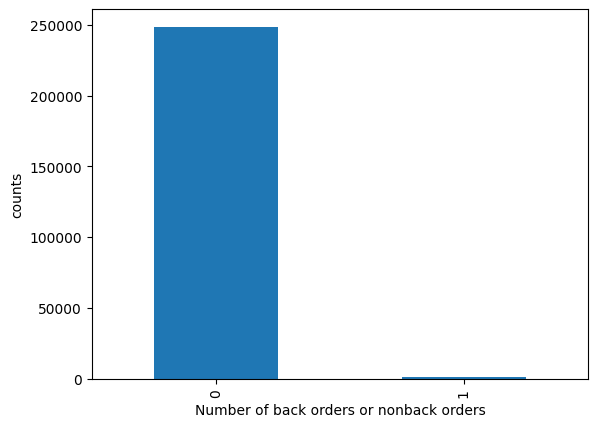

In [37]:
#Target variable analysis
fig = df['went_on_backorder'].value_counts().plot.bar()
fig.set_xlabel('Number of back orders or nonback orders')
fig.set_ylabel('counts')

<Axes: title={'center': 'impact of lead time on backorder'}, xlabel='lead_time'>

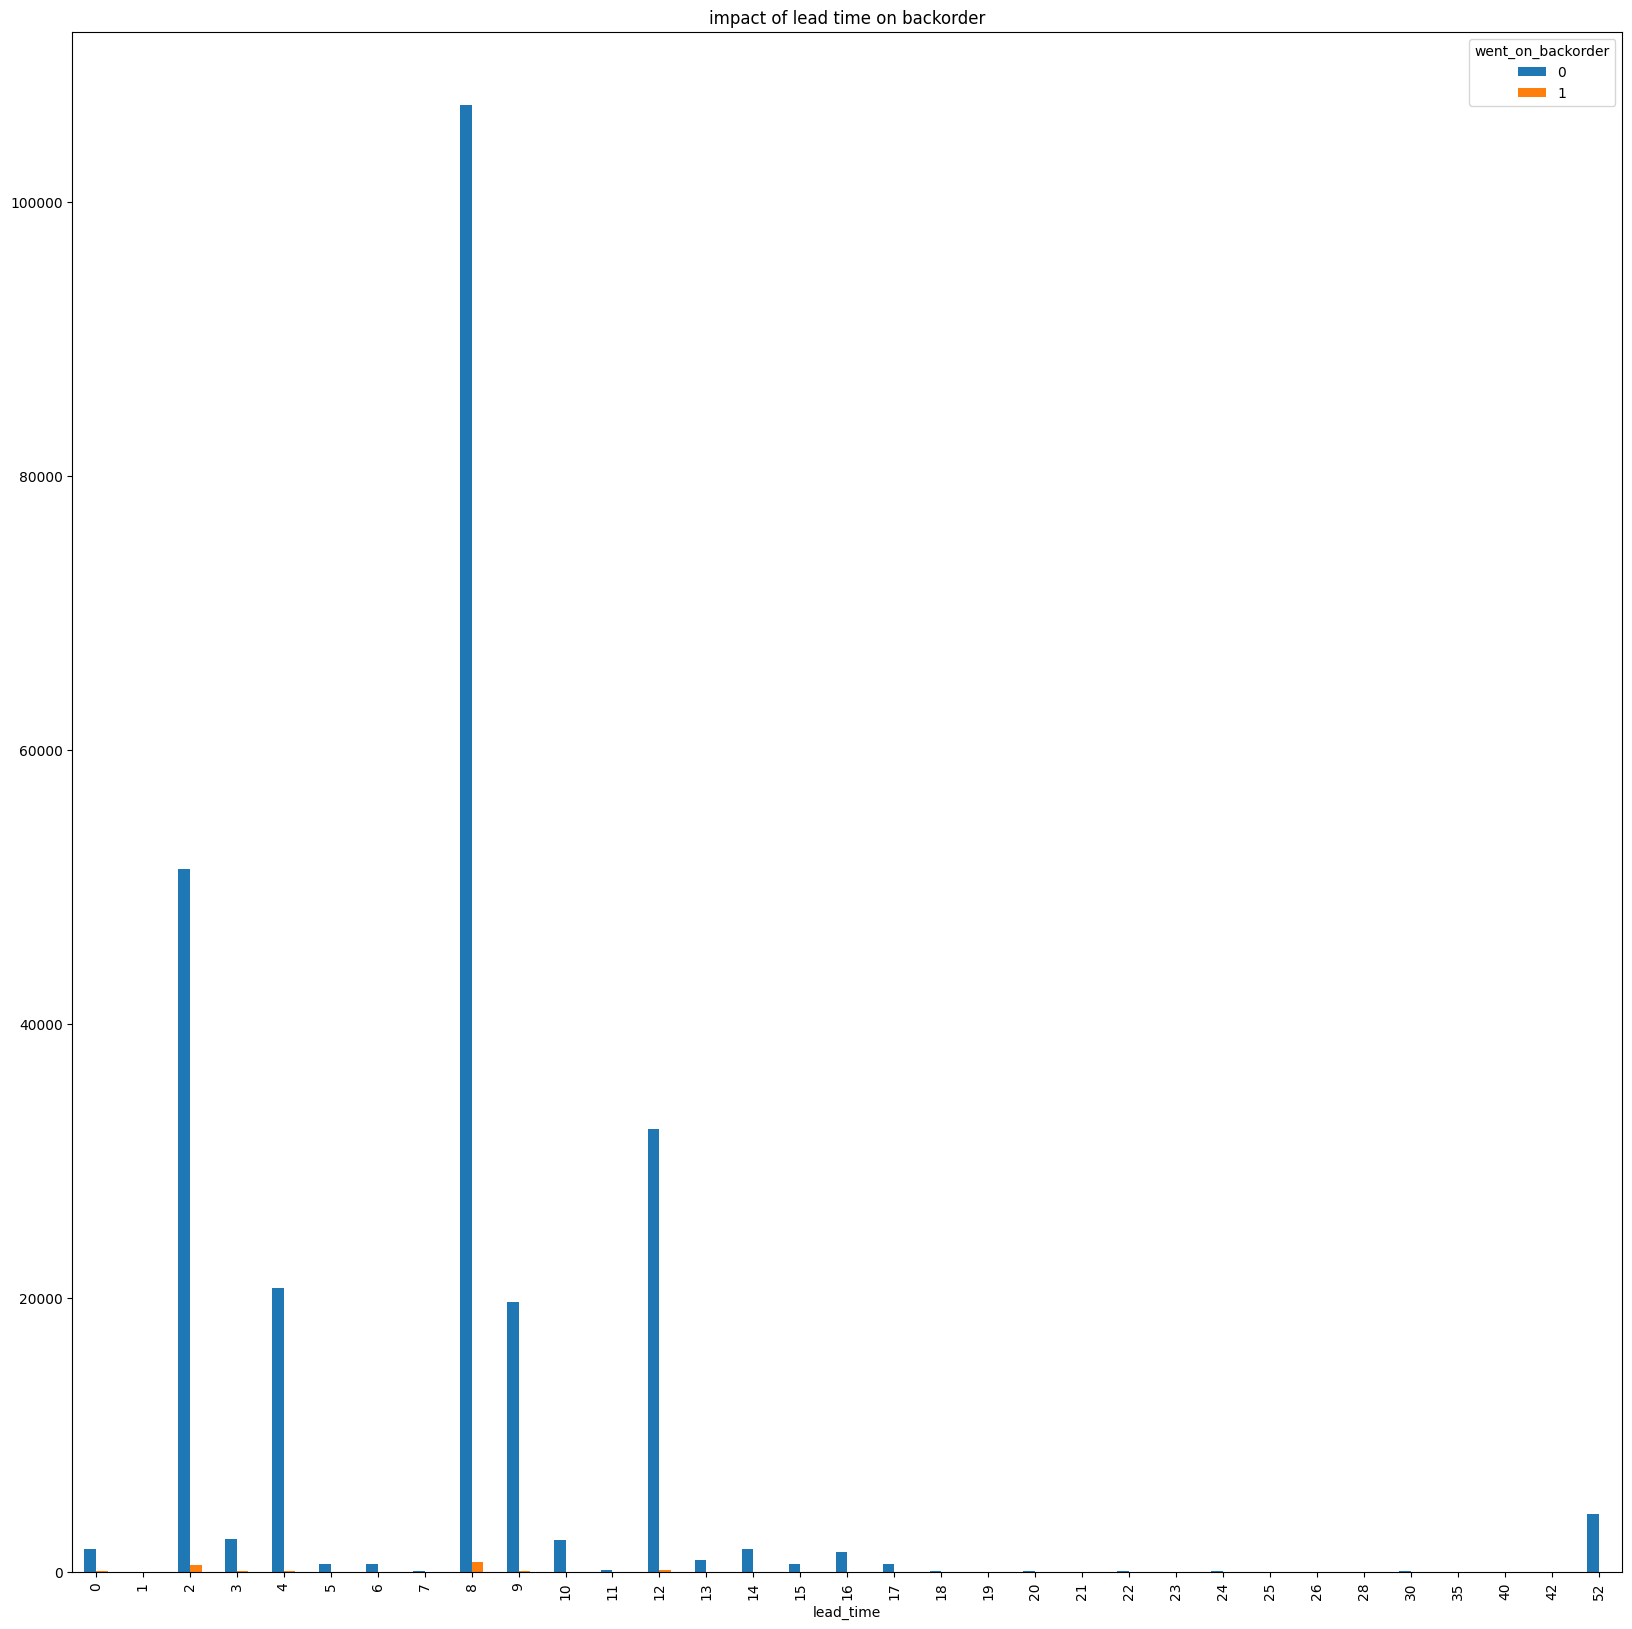

In [38]:
#impact of lead time on backorder
pd.crosstab(df.lead_time,df.went_on_backorder).plot(kind='bar',title='impact of lead time on backorder',figsize=(20,20))

In [55]:
#within 12 days company should deliver the product

In [39]:
#recode binary variables as 0 / 1 rather than No / Yes
for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:
    df[col]=pd.factorize(df[col])[0]

In [40]:
df['perf_12_month_avg'].unique()
df['perf_6_month_avg']=df['perf_6_month_avg'].replace(-99, np.NaN)
df['perf_12_month_avg']=df['perf_12_month_avg'].replace(-99, np.NaN)
df.fillna(df.median(), inplace=True)

array([0.75, 0.66, 0.78, 0.74, 0.96, 0.7 , 0.99, 0.76, 0.71, 0.88, 0.8 ,
       0.86, 0.79, 0.09, 1.  , 0.  , 0.81, 0.67, 0.85, 0.24, 0.98, 0.63,
       0.46, 0.9 , 0.82, 0.93, 0.83, 0.53, 0.64, 0.5 , 0.69, 0.59, 0.97,
       0.16, 0.92, 0.84, 0.89, 0.61, 0.77, 0.42, 0.87, 0.95, 0.35, 0.94,
       0.31, 0.91, 0.34, 0.18, 0.73, 0.13, 0.68, 0.48, 0.45, 0.27, 0.36,
       0.05, 0.14, 0.41, 0.1 , 0.4 , 0.52, 0.6 , 0.32, 0.65, 0.26, 0.37,
       0.56, 0.47, 0.62, 0.3 , 0.23, 0.01, 0.33, 0.28, 0.15, 0.49, 0.72,
       0.57, 0.44, 0.04, 0.55, 0.08, 0.25, 0.22, 0.54, 0.06, 0.21, 0.43,
       0.58, 0.2 , 0.17, 0.12, 0.51, 0.39, 0.19, 0.38, 0.11, 0.29, 0.07,
       0.02, 0.03])

In [41]:
df=df.drop(['sku'],axis=1)

In [42]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,8,12,0,0,0,0,1,1,2,5,...,0,0.63,0.75,0,0,0,0,0,0,0
1,83,2,33,157,377,603,44,98,148,156,...,0,0.68,0.66,0,0,0,0,0,0,0
2,8,4,0,0,0,0,0,0,1,1,...,0,0.73,0.78,0,0,0,0,0,0,0
3,31,4,63,70,160,223,27,90,164,219,...,0,0.73,0.78,0,0,0,1,0,0,0
4,3,12,0,0,0,0,0,0,0,0,...,0,0.81,0.74,0,0,0,0,0,0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250078 entries, 0 to 250077
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   national_inv       250078 non-null  int64  
 1   lead_time          250078 non-null  int64  
 2   in_transit_qty     250078 non-null  int64  
 3   forecast_3_month   250078 non-null  int64  
 4   forecast_6_month   250078 non-null  int64  
 5   forecast_9_month   250078 non-null  int64  
 6   sales_1_month      250078 non-null  int64  
 7   sales_3_month      250078 non-null  int64  
 8   sales_6_month      250078 non-null  int64  
 9   sales_9_month      250078 non-null  int64  
 10  min_bank           250078 non-null  int64  
 11  potential_issue    250078 non-null  int64  
 12  pieces_past_due    250078 non-null  int64  
 13  perf_6_month_avg   250078 non-null  float64
 14  perf_12_month_avg  250078 non-null  float64
 15  local_bo_qty       250078 non-null  int64  
 16  de

In [44]:
Y=df['went_on_backorder']
X=df.drop(['went_on_backorder'],axis=1)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1)

In [46]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_jobs = -1)
RF.fit(X_train, Y_train)
Y_pred = RF.predict(X_test)

RandomForestClassifier(n_jobs=-1)

In [47]:
RF.score(X_test,Y_test)

0.99420185540627

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve
print('Random Forest Classifier accuracy: %0.3f'% accuracy_score(Y_pred, Y_test))

Random Forest Classifier accuracy: 0.994


In [49]:
print("Random Forest Classifier report \n", classification_report(Y_pred, Y_test))

Random Forest Classifier report 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     24991
           1       0.09      0.82      0.16        17

    accuracy                           0.99     25008
   macro avg       0.54      0.91      0.58     25008
weighted avg       1.00      0.99      1.00     25008



In [50]:
def roc_curve_acc(Y_test, Y_pred, method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='cyan' ,label='%s AUC = %0.3f'% (method, roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

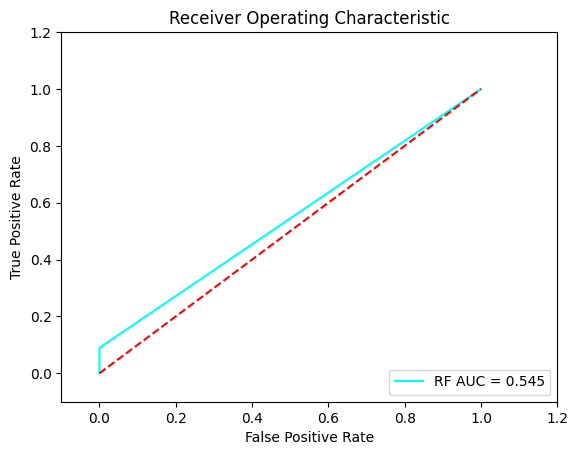

In [56]:
roc_curve_acc(Y_test, Y_pred, "RF")

In [57]:
print('roc_auc_score: %0.3f'% roc_auc_score(Y_pred, Y_test))

roc_auc_score: 0.909


In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve
print('Random Forest Classifier accuracy: %0.3f'% accuracy_score(Y_pred, Y_test))

Random Forest Classifier accuracy: 0.994
